<h1>Bank Customer Churn Prediction Team Project</h1>
<h2>Group Members</h2>
<ul>
  <li><strong>Tomas King | ID: 000819529 | Email: tking109@students.kennesaw.edu</strong></li>
  <li><strong>Casey Gilliam | ID: 000860691| Email: cgilli10@students.kennesaw.edu</strong></li>
  <li><strong>Rohini Paithanker | ID: 000980941 | Email: rpaithan@students.kennesaw.edu</strong></li>
  <li><strong>Gowtamy Reddy Godhala | ID: 001108343 | Email: ggodhala@students.kennesaw.edu</strong></li>
</ul>


In [ ]:
# Google Collab was used to coordinate the notebook accross the team
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = "/content/drive/MyDrive/CSV/churn.csv"
df = pd.read_csv(path)

<h1>Preliminary Analysis</h1>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<h2>Histograms & Value Counts for Preliminary Analysis</h2>

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

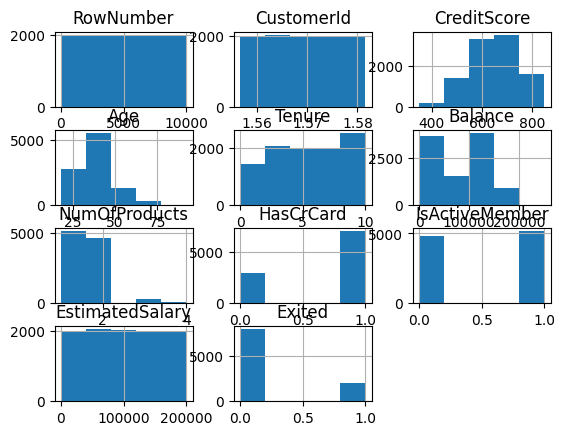

In [ ]:
df.hist(bins = 5)

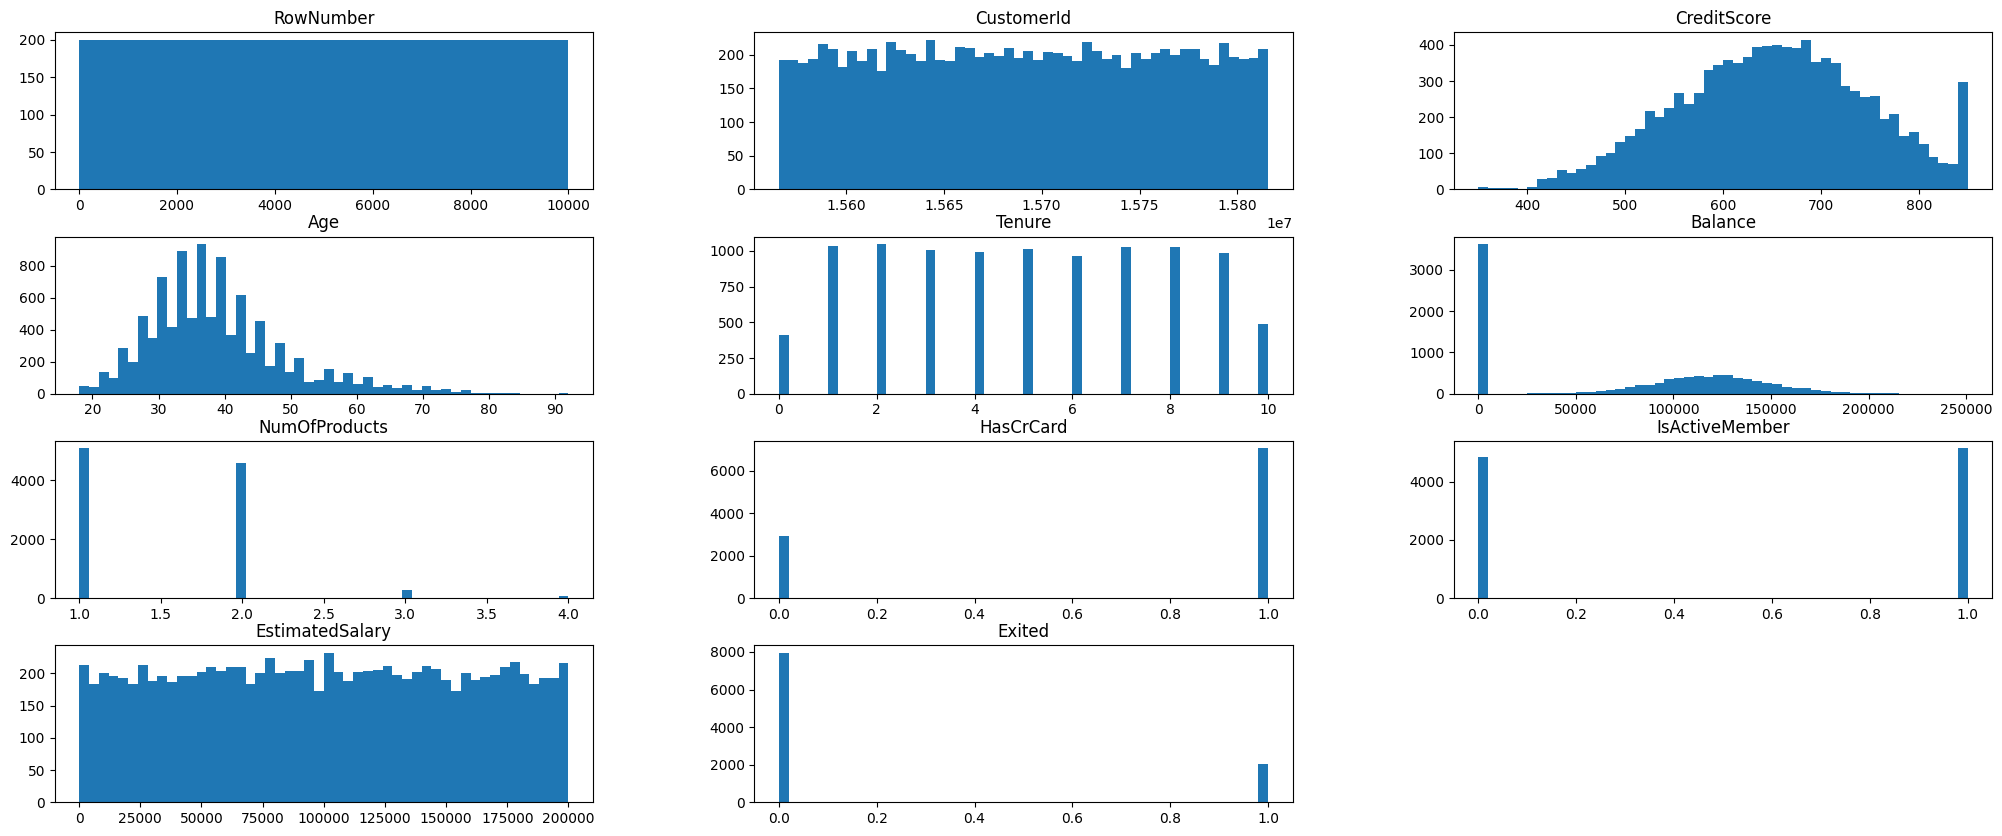

In [ ]:
df.hist(bins=50, figsize=(25,10), grid=False) #bins
plt.show()

<Axes: >

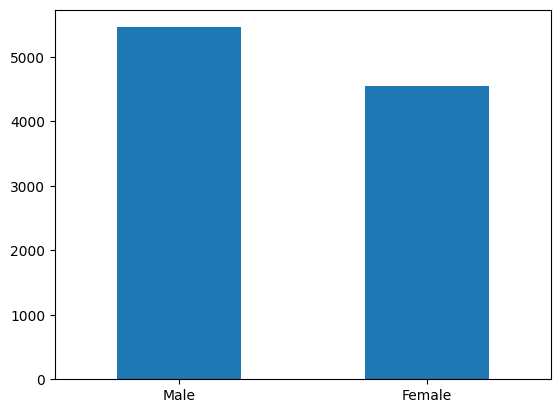

In [ ]:
df["Gender"].value_counts().plot.bar(y='count', rot=0)

<Axes: >

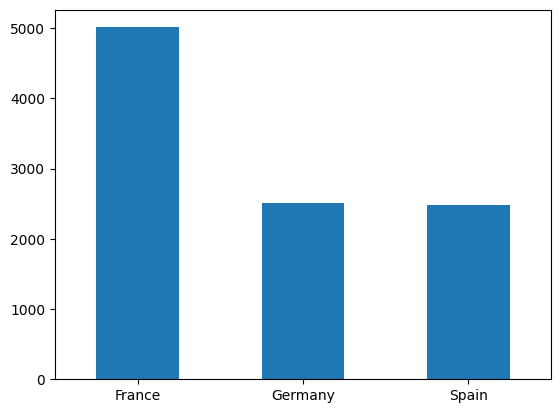

In [ ]:
df["Geography"].value_counts().plot.bar(y='count', rot=0)

In [ ]:
print(df['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


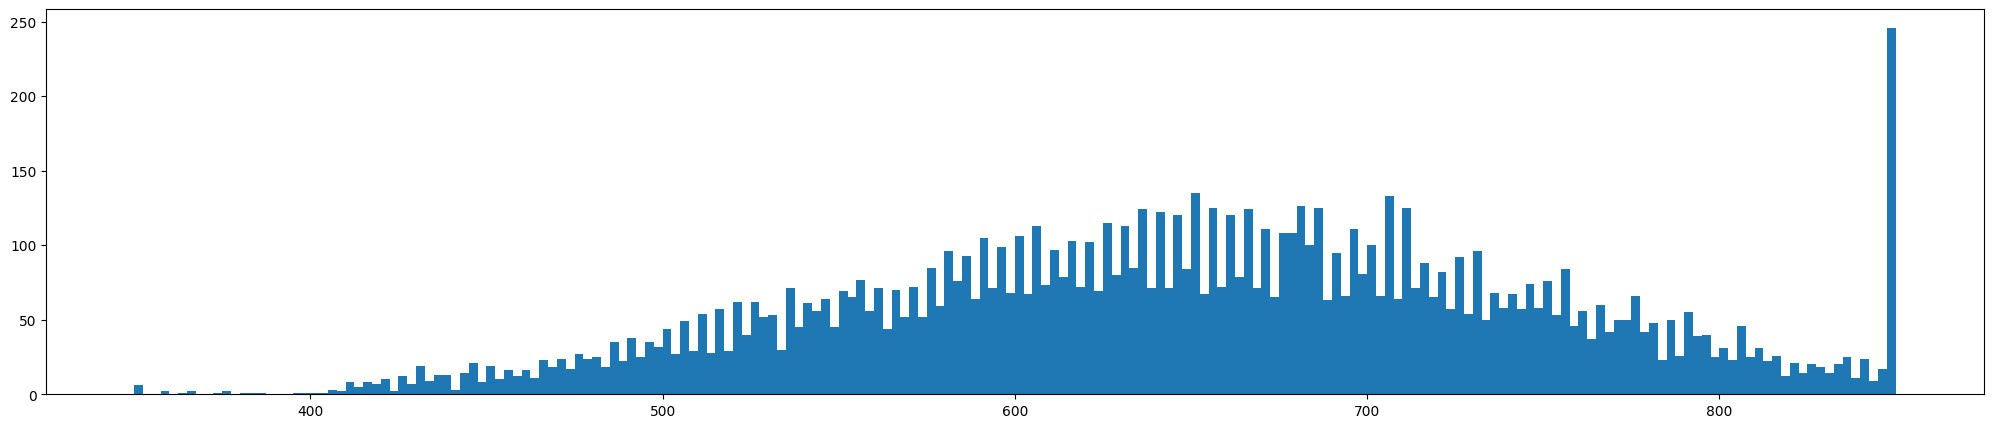

In [ ]:
df['CreditScore'].hist(bins=200, figsize=(25,5), grid=False) #bins
plt.show()

In [ ]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

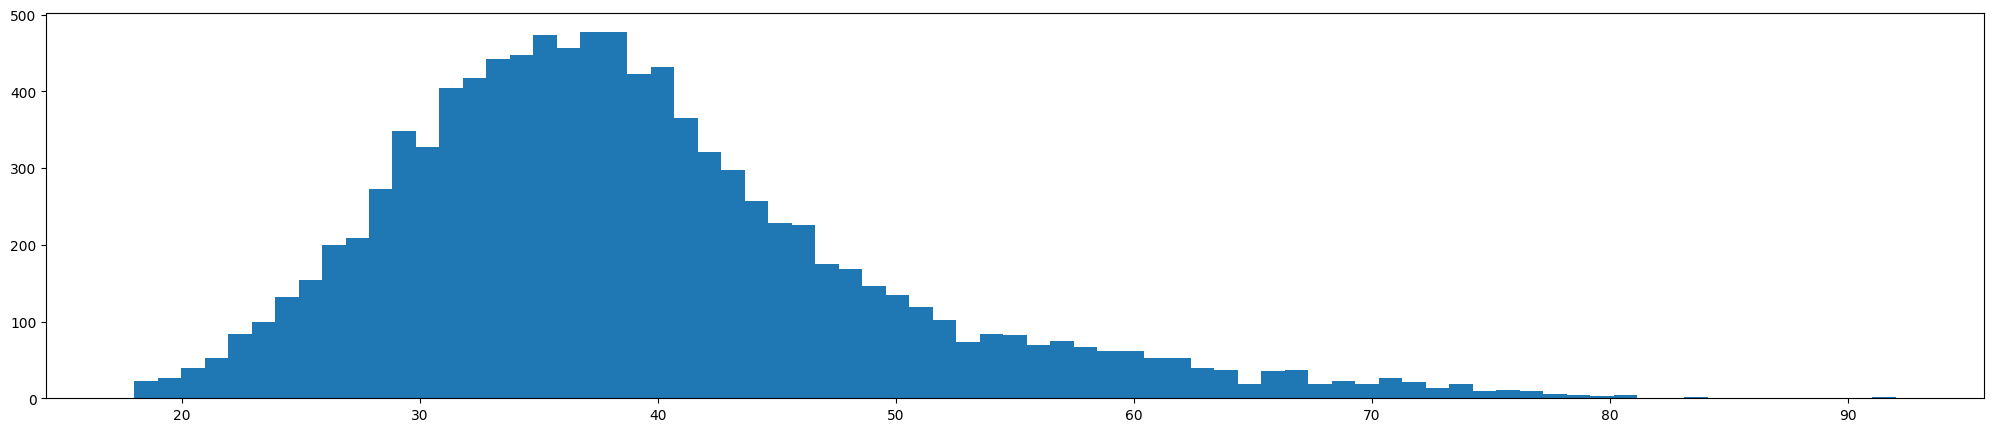

In [ ]:
df['Age'].hist(bins=75, figsize=(25,5), grid=False) #bins
plt.show()

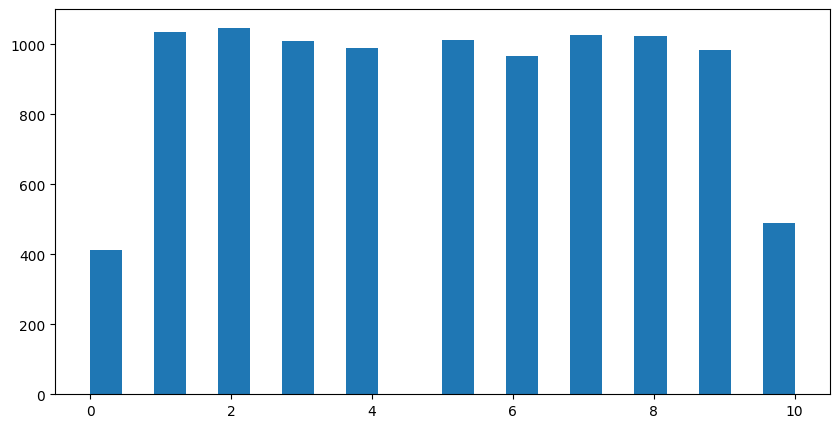

In [ ]:
df['Tenure'].hist(bins=22, figsize=(10,5), grid=False) #bins
plt.show()

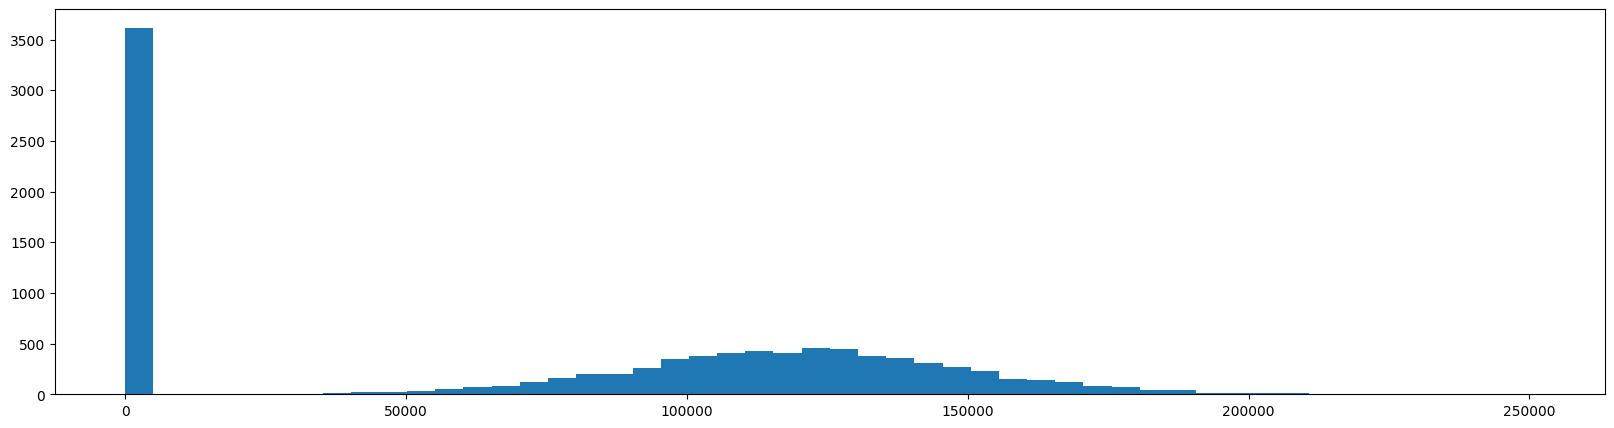

In [ ]:
df['Balance'].hist(bins=50, figsize=(20,5), grid=False) #bins
plt.show()

In [ ]:
df['Balance'].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

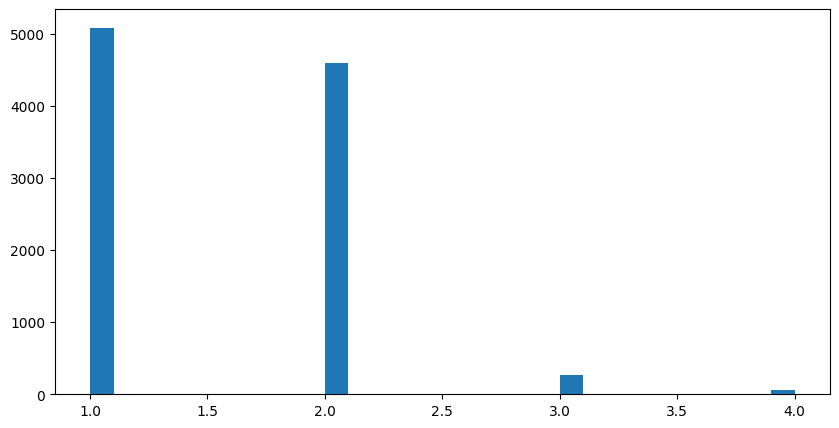

In [ ]:
df['NumOfProducts'].hist(bins=30, figsize=(10,5), grid=False) #bins
plt.show()

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: >

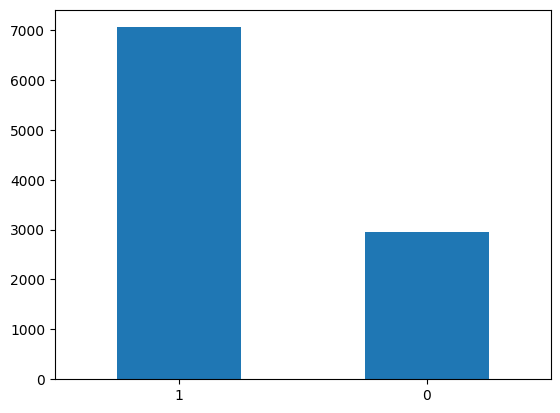

In [ ]:
df["HasCrCard"].value_counts().plot.bar(y='count', rot=0)

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<Axes: >

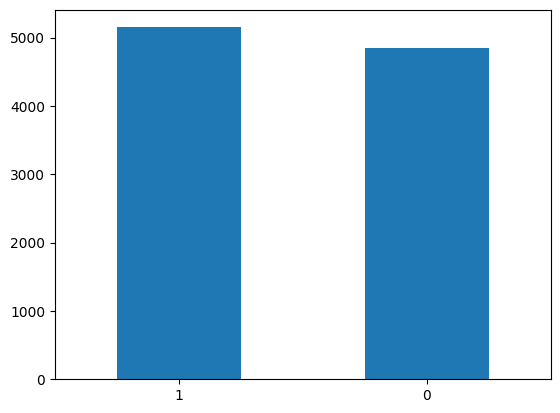

In [ ]:
df["IsActiveMember"].value_counts().plot.bar(y='count', rot=0)

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

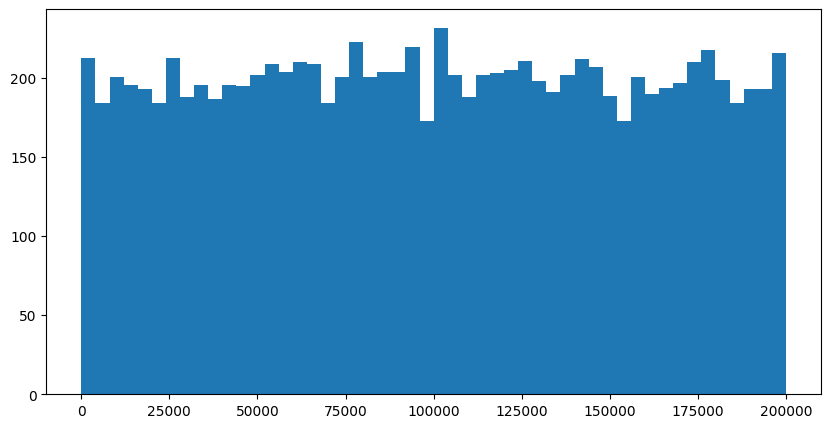

In [ ]:
df['EstimatedSalary'].hist(bins=50, figsize=(10,5), grid=False) #bins
plt.show()

<Axes: >

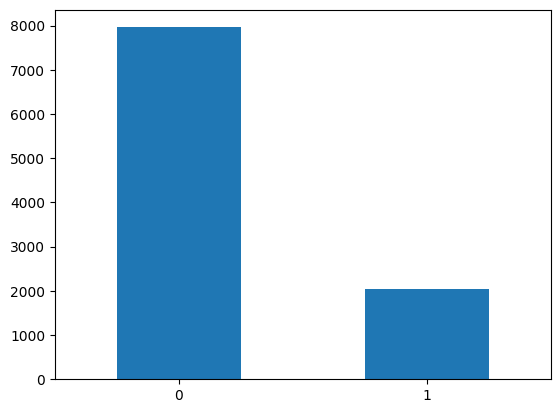

In [ ]:
df["Exited"].value_counts().plot.bar(y='count', rot=0)

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<h1>Preprocessing</h1>

In [ ]:
# Dropping the 'RowNumber', 'CustomerId', 'Surname', and 'Geography' columns
df_dropped= df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1)

print(df_dropped.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2       0.00              1          1   
1          608  Female   41       1   83807.86              1          0   
2          502  Female   42       8  159660.80              3          1   
3          699  Female   39       1       0.00              2          0   
4          850  Female   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  


In [ ]:
# Apply one-hot encoding to the 'Gender' column
df_prepro= pd.get_dummies(df_dropped, columns=['Gender'])

# Reorder the columns to make 'Exited' the last column
column_order = [col for col in df_prepro.columns if col != 'Exited'] + ['Exited']
df_fp = df_prepro[column_order]

print(df_fp.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  Exited  
0               1        101348.88              1            0       1  
1               1        112542.58              1            0       0  
2               0        113931.57              1            0       1  
3               0         93826.63              1            0       0  
4               1         79084.10              1            0       0  


In [ ]:
#Hypothesis 1 dropping the values to make a data frame to run without them to see impact on model
df_ph1 = df_fp.drop(['Age', 'Tenure'], axis=1)
#Hypothesis 2 dropping values for hypothesis 2 data frame
df_ph2 = df_fp.drop(['NumOfProducts', 'HasCrCard', 'IsActiveMember'], axis=1)

<h3>Train Test Split & Pipeline</h3>

In [ ]:
#Split the data set with the whole dataset to be used on a base line to compare hypothesis models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer


x = df_fp.drop('Exited', axis=1)
y = df_fp['Exited']

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

num_cols = trainX.columns[(trainX.dtypes == np.int64) | (trainX.dtypes == np.float64)]
#Standardization and yeo-johnson transformation used to account for some outliers and skewing in the data
num_pipeline = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
])
#Apply the pipeline TrainX_prc is the base line train and test data set
trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)
trainX_prc.shape, testX_prc.shape



((8000, 8), (2000, 8))

In [ ]:
#Split the data from hypothesis 1 dataframe
x_h1 = df_ph1.drop('Exited', axis=1)
y_h1 = df_ph1['Exited']

trainX_h1, testX_h1, trainY_h1, testY_h1 = train_test_split(x_h1, y_h1, test_size=0.2)

num_cols_h1 = trainX_h1.columns[(trainX_h1.dtypes == np.int64) | (trainX_h1.dtypes == np.float64)]
#Apply the pipeline to the split dataset
num_pipeline_h1 = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

full_pipeline_h1 = ColumnTransformer([
    ('numeric', num_pipeline_h1, num_cols_h1),
])

trainX_prc_h1 = full_pipeline_h1.fit_transform(trainX_h1)
testX_prc_h1 = full_pipeline_h1.transform(testX_h1)
trainX_prc_h1.shape, testX_prc_h1.shape
#trainX_prc_h1 and testX_prc_h1 are to be used for H1 testing models

((8000, 6), (2000, 6))

In [ ]:
#Split the data from hypotheis 2 dataframe
x_h2 = df_ph2.drop('Exited', axis=1)
y_h2 = df_ph2['Exited']

trainX_h2, testX_h2, trainY_h2, testY_h2 = train_test_split(x_h2, y_h2, test_size=0.2)

num_cols_h2 = trainX_h2.columns[(trainX_h2.dtypes == np.int64) | (trainX_h2.dtypes == np.float64)]
#Apply the pipeline to hypothesis 2 dataframe
num_pipeline_h2 = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

full_pipeline_h2 = ColumnTransformer([
    ('numeric', num_pipeline_h2, num_cols_h2),
])

trainX_prc_h2 = full_pipeline_h2.fit_transform(trainX_h2)
testX_prc_h2 = full_pipeline_h2.transform(testX_h2)
trainX_prc_h2.shape, testX_prc_h2.shape
#trainX_prc_h2 and testX_prc_h2 are to be used for H2 testing models

((8000, 5), (2000, 5))

<h1>Model Selection, Training & Fine-tuning</h1>

<h1>Random Forest</h1>

<h2>Base Model</h2>
<p>Split Values: (trainX_prc, trainY), (testX_prc, testY) </p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier with a range of depths to try
rf = RandomForestClassifier(random_state=42)

# Setup the parameters and distributions to use
param_dist = {'max_depth': [3, 5, 10, 20, 40, None]}

In [ ]:
# Instantiate the GridSearchCV object: rf_cv
rf_cv = GridSearchCV(rf, param_dist, scoring='accuracy', cv=5)

# Fit it to the training data
rf_cv.fit(trainX_prc, trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 20, 40, None]},
             scoring='accuracy')

In [ ]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 10}
Best score is 0.85375


In [ ]:
# Predict on the test set
test_pred = rf_cv.predict(testX_prc)

# Evaluate the model
accuracy = accuracy_score(testY, test_pred)
precision = precision_score(testY, test_pred)
recall = recall_score(testY, test_pred)
f1 = f1_score(testY, test_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.76
Recall: 0.43
F1 Score: 0.55


<h2>Hypothesis 1</h2>
<p>Split Values: (trainX_prc_h1, trainY_h1), (testX_prc_h1, testY_h1) </p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier
rf_h1 = RandomForestClassifier(random_state=42)

# Define a range of "max_depth" values to explore which depth is best
param_grid_h1 = {
    'max_depth': [3, 5, 10, 20, None],
}

In [ ]:
# Setup GridSearchCV to find the best 'max_depth' using cross-validation
grid_search_h1 = GridSearchCV(estimator=rf_h1, param_grid=param_grid_h1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_h1.fit(trainX_prc_h1, trainY_h1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None]},
             scoring='accuracy')

In [ ]:
# Retrieve the best hyperparameters
best_params_h1 = grid_search_h1.best_params_
best_depth_h1 = best_params_h1['max_depth']
print(f"Best parameters for Hypothesis 1: {best_params_h1}")

Best parameters for Hypothesis 1: {'max_depth': 5}


In [ ]:
# Use the best model to predict on the test set
best_rf_h1 = grid_search_h1.best_estimator_
test_pred_h1 = best_rf_h1.predict(testX_prc_h1)

In [ ]:
# Calculate evaluation metrics
accuracy_h1 = accuracy_score(testY_h1, test_pred_h1)
precision_h1 = precision_score(testY_h1, test_pred_h1)
recall_h1 = recall_score(testY_h1, test_pred_h1)
f1_h1 = f1_score(testY_h1, test_pred_h1)

# Print the evaluation metrics
print(f"Accuracy for Hypothesis 1: {accuracy_h1:.2f}")
print(f"Precision for Hypothesis 1: {precision_h1:.2f}")
print(f"Recall for Hypothesis 1: {recall_h1:.2f}")
print(f"F1 Score for Hypothesis 1: {f1_h1:.2f}")

# Print the best depth
print(f"Best depth for Hypothesis 1: {best_depth_h1}")

Accuracy for Hypothesis 1: 0.82
Precision for Hypothesis 1: 0.88
Recall for Hypothesis 1: 0.14
F1 Score for Hypothesis 1: 0.24
Best depth for Hypothesis 1: 5


<h2>Hypothesis 2</h2>
<p>Split Values: (trainX_prc_h2, trainY_h2), (testX_prc_h2, testY_h2) </p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier for Hypothesis 2
rf_h2 = RandomForestClassifier(random_state=42)

# Define a range of "max_depth" values for Hypothesis 2
param_grid_h2 = {
    'max_depth': [3, 5, 10, 20, None],
}

In [ ]:
# Setup GridSearchCV for Hypothesis 2
grid_search_h2 = GridSearchCV(estimator=rf_h2, param_grid=param_grid_h2, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data for Hypothesis 2
grid_search_h2.fit(trainX_prc_h2, trainY_h2)

# Retrieve the best hyperparameters for Hypothesis 2
best_params_h2 = grid_search_h2.best_params_
best_depth_h2 = best_params_h2['max_depth']
print(f"Best parameters for Hypothesis 2: {best_params_h2}")

Best parameters for Hypothesis 2: {'max_depth': 10}


In [ ]:
# Use the best model from grid search to predict on the test set for Hypothesis 2
best_rf_h2 = grid_search_h2.best_estimator_
test_pred_h2 = best_rf_h2.predict(testX_prc_h2)

In [ ]:
# Calculate evaluation metrics for Hypothesis 2
accuracy_h2 = accuracy_score(testY_h2, test_pred_h2)
precision_h2 = precision_score(testY_h2, test_pred_h2)
recall_h2 = recall_score(testY_h2, test_pred_h2)
f1_h2 = f1_score(testY_h2, test_pred_h2)

# Print the evaluation metrics for Hypothesis 2
print(f"Accuracy for Hypothesis 2: {accuracy_h2:.2f}")
print(f"Precision for Hypothesis 2: {precision_h2:.2f}")
print(f"Recall for Hypothesis 2: {recall_h2:.2f}")
print(f"F1 Score for Hypothesis 2: {f1_h2:.2f}")

# Print the best depth for Hypothesis 2
print(f"Best depth for Hypothesis 2: {best_depth_h2}")

Accuracy for Hypothesis 2: 0.80
Precision for Hypothesis 2: 0.65
Recall for Hypothesis 2: 0.23
F1 Score for Hypothesis 2: 0.34
Best depth for Hypothesis 2: 10


<h1>L1 Regularization</h1>

<h2>Base Model</h2>
<p>Split Values: (trainX_prc, trainY), (testX_prc, testY) </p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have preprocessed data stored in trainX_prc, testX_prc, trainY, and testY

# Create a Logistic Regression model with L1 regularization
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = [{'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}]


# Initialize GridSearchCV
logistic_l1_cv = GridSearchCV(logistic_l1, param_grid, scoring='accuracy', cv=5)

In [ ]:
# Fit the model
logistic_l1_cv.fit(trainX_prc, trainY)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, penalty='l1',
                                          solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                1000]}],
             scoring='accuracy')

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression (L1) Parameters: {}".format(logistic_l1_cv.best_params_))
print("Best score is {}".format(logistic_l1_cv.best_score_))

Tuned Logistic Regression (L1) Parameters: {'C': 0.5}
Best score is 0.8161250000000001


In [ ]:
# Optionally, predict on the test set and evaluate the performance
test_pred_logistic_l1 = logistic_l1_cv.predict(testX_prc)
accuracy_logistic_l1 = accuracy_score(testY, test_pred_logistic_l1)
print("Accuracy on the test set: {}".format(accuracy_logistic_l1))

Accuracy on the test set: 0.817


In [ ]:
# Get the best L1 logistic regression model
best_l1_logistic = logistic_l1_cv.best_estimator_



In [ ]:
# Predict on the test set
test_pred_logistic_l1 = best_l1_logistic.predict(testX_prc)



In [ ]:
# Evaluate the model
accuracy_logistic_l1 = accuracy_score(testY, test_pred_logistic_l1)
precision_logistic_l1 = precision_score(testY, test_pred_logistic_l1)
recall_logistic_l1 = recall_score(testY, test_pred_logistic_l1)
f1_logistic_l1 = f1_score(testY, test_pred_logistic_l1)



In [ ]:
# Print the evaluation metrics for L1 regularization
print("\nL1 Regularization Evaluation Metrics:")
print(f"Accuracy: {accuracy_logistic_l1:.2f}")
print(f"Precision: {precision_logistic_l1:.2f}")
print(f"Recall: {recall_logistic_l1:.2f}")
print(f"F1 Score: {f1_logistic_l1:.2f}")


L1 Regularization Evaluation Metrics:
Accuracy: 0.82
Precision: 0.57
Recall: 0.22
F1 Score: 0.32


<h2>Hypothesis 1</h2>
<p>Split Values: (trainX_prc_h1, trainY_h1), (testX_prc_h1, testY_h1) </p>

In [ ]:
# Perform a grid search for L1 regularization
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)
param_grid_h1_l1 = [{'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}]

grid_search_h1_l1 = GridSearchCV(logistic_l1, param_grid_h1_l1, cv=5, scoring='accuracy', return_train_score=True)
grid_search_h1_l1.fit(trainX_prc_h1, trainY_h1)




GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, penalty='l1',
                                          solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get the best estimator from the grid search
best_l1_logistic_h1 = grid_search_h1_l1.best_estimator_

# Predict on the test set for Hypothesis 1 with L1 regularization
test_pred_logistic_h1 = best_l1_logistic_h1.predict(testX_prc_h1)



In [ ]:
# Evaluate the model for Hypothesis 1 with L1 regularization
accuracy_l1_h1 = accuracy_score(testY_h1, test_pred_logistic_h1)
precision_l1_h1 = precision_score(testY_h1, test_pred_logistic_h1)
f1_l1_h1 = f1_score(testY_h1, test_pred_logistic_h1)
recall_l1_h1 = recall_score(testY_h1, test_pred_logistic_h1)


# Print the evaluation metrics for Hypothesis 1 with L1 regularization
print(f"Accuracy for Hypothesis 1 with L1 regularization: {accuracy_l1_h1:.2f}")
print(f"Precision for Hypothesis 1 with L1 regularization: {precision_l1_h1:.2f}")
print(f"F1 Score for Hypothesis 1 with L1 regularization: {f1_l1_h1:.2f}")
print(f"Recall for Hypothesis 1 with L1 regularization: {recall_l1_h1:.2f}")

Accuracy for Hypothesis 1 with L1 regularization: 0.79
Precision for Hypothesis 1 with L1 regularization: 0.00
F1 Score for Hypothesis 1 with L1 regularization: 0.00
Recall for Hypothesis 1 with L1 regularization: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Hypothesis 2</h2>
<p>Split Values: (trainX_prc_h2, trainY_h2), (testX_prc_h2, testY_h2) </p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating model
logistic_l1_h2 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)

# Defining the parameter grid for hyperparameter tuning
param_grid_l1_h2 = [{'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}]

# Applying L1 regularization using GridSearchCV
grid_search_l1_h2 = GridSearchCV(logistic_l1_h2, param_grid_l1_h2, cv=5, scoring='accuracy', return_train_score=True)
grid_search_l1_h2.fit(trainX_prc_h2, trainY_h2)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, penalty='l1',
                                          solver='liblinear'),
             param_grid=[{'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get best param and accuracy for train model with L1 regularization
print(grid_search_l1_h2.best_params_)
print(grid_search_l1_h2.best_score_) # accuracy


{'C': 0.1}
0.7866250000000001


In [ ]:
# Obtaining metrics for test model after tuning with L1 regularization
best_l1_logistic_h2 = grid_search_l1_h2.best_estimator_
accuracy_l1_h2 = best_l1_logistic_h2.score(testX_prc_h2, testY_h2)
f1_l1_h2 = f1_score(testY_h2, best_l1_logistic_h2.predict(testX_prc_h2))
precision_l1_h2 = precision_score(testY_h2, best_l1_logistic_h2.predict(testX_prc_h2))
recall_l1_h2 = recall_score(testY_h2, best_l1_logistic_h2.predict(testX_prc_h2))

In [ ]:
# Print the evaluation metrics for hypothesis 2 with L1 regularization
print(f"Accuracy for hypothesis 2 (L1): {accuracy_l1_h2:.2f}")
print(f"Precision for hypothesis 2 (L1): {precision_l1_h2:.2f}")
print(f"F1 Score for hypothesis 2 (L1): {f1_l1_h2:.2f}")
print(f"Recall for hypothesis 2 (L1): {recall_l1_h2:.2f}")


Accuracy for hypothesis 2 (L1): 0.77
Precision for hypothesis 2 (L1): 0.39
F1 Score for hypothesis 2 (L1): 0.12
Recall for hypothesis 2 (L1): 0.07


<h1>L2 Regularization</h1>

<h2>Base Model</h2>
<p>Split Values: (trainX_prc, trainY), (testX_prc, testY) </p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

#creating model
logistic = LogisticRegression()

from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [ 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#L2 regularization is used for fine tuning
logistic = LogisticRegression(penalty='l2', max_iter=3000)
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid=[{'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get best param and accuracy for train model
print(grid_search.best_params_)
print(grid_search.best_score_) #accuracy

{'C': 0.05}
0.8163750000000001


In [ ]:
# Obtaining metrics for test model after tuning
best_l2_logistic = grid_search.best_estimator_
accuracy = best_l2_logistic.score(testX_prc, testY)
f1 = f1_score(testY, best_l2_logistic.predict(testX_prc))
precision = precision_score(testY, best_l2_logistic.predict(testX_prc))
recall = recall_score(testY, best_l2_logistic.predict(testX_prc))

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.82
Precision: 0.58
F1 Score: 0.31
Recall: 0.22


<h2>Hypothesis 1</h2>
<p>Split Values: (trainX_prc_h1, trainY_h1), (testX_prc_h1, testY_h1) </p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

#creating model
logistic = LogisticRegression()

from sklearn.model_selection import GridSearchCV
param_grid_h1 = [{'C': [ 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#L2 regularization is used for fine tuning
logistic = LogisticRegression(penalty='l2', max_iter=3000)
grid_search_h1 = GridSearchCV(logistic, param_grid_h1, cv=5, scoring='accuracy', return_train_score=True)
grid_search_h1.fit(trainX_prc_h1,trainY_h1)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid=[{'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get best param and accuracy for train model
print(grid_search_h1.best_params_)
print(grid_search_h1.best_score_) #accuracy

{'C': 0.05}
0.7976249999999999


In [ ]:
# Obtaining metrics for test model after tuning
best_l2_logistic = grid_search_h1.best_estimator_
accuracy_h1 = best_l2_logistic.score(testX_prc_h1, testY_h1)
f1_h1 = f1_score(testY_h1, best_l2_logistic.predict(testX_prc_h1))
precision_h1 = precision_score(testY_h1, best_l2_logistic.predict(testX_prc_h1))
recall_h1 = recall_score(testY_h1, best_l2_logistic.predict(testX_prc_h1))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the evaluation metrics
print(f"Accuracy for hypothesis1: {accuracy_h1:.2f}")
print(f"Precision for hypothesis1: {precision_h1:.2f}")
print(f"F1 Score for hypothesis1: {f1_h1:.2f}")
print(f"Recall for hypothesis1: {recall_h1:.2f}")

Accuracy for hypothesis1: 0.79
Precision for hypothesis1: 0.00
F1 Score for hypothesis1: 0.00
Recall for hypothesis1: 0.00


<h2>Hypothesis 2</h2>
<p>Split Values: (trainX_prc_h2, trainY_h2), (testX_prc_h2, testY_h2) </p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

#creating model
logistic = LogisticRegression()

from sklearn.model_selection import GridSearchCV
param_grid_h2 = [{'C': [ 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#L2 regularization is used for fine tuning
logistic = LogisticRegression(penalty='l2', max_iter=3000)
grid_search_h2 = GridSearchCV(logistic, param_grid_h2, cv=5, scoring='accuracy', return_train_score=True)
grid_search_h2.fit(trainX_prc_h2,trainY_h2)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid=[{'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# Get best param and accuracy for train model
print(grid_search_h2.best_params_)
print(grid_search_h2.best_score_) #accuracy

{'C': 0.05}
0.7869999999999999


In [ ]:
# Obtaining metrics for test model after tuning
best_l2_logistic = grid_search_h2.best_estimator_
accuracy_h2 = best_l2_logistic.score(testX_prc_h2, testY_h2)
f1_h2 = f1_score(testY_h2, best_l2_logistic.predict(testX_prc_h2))
precision_h2 = precision_score(testY_h2, best_l2_logistic.predict(testX_prc_h2))
recall_h2 = recall_score(testY_h2, best_l2_logistic.predict(testX_prc_h2))

In [ ]:
# Print the evaluation metrics for hypothesis 2
print(f"Accuracy for hypothesis 2: {accuracy_h2:.2f}")
print(f"Precision for hypothesis 2: {precision_h2:.2f}")
print(f"F1 Score for hypothesis 2: {f1_h2:.2f}")
print(f"Recall for hypothesis 2: {recall_h2:.2f}")

Accuracy for hypothesis 2: 0.77
Precision for hypothesis 2: 0.40
F1 Score for hypothesis 2: 0.12
Recall for hypothesis 2: 0.07


<h1>Neural Network</h1>

<h2>Base Model</h2>
<p>Split Values: (trainX_prc, trainY), (testX_prc, testY) </p>

In [ ]:
#Untuned Neural Network results for comparison using the base model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

n_features = trainX_prc.shape[1] #get the number of input features
mlp = MLPClassifier(hidden_layer_sizes=[n_features,n_features,n_features], max_iter=1000)

mlp.fit(trainX_prc, trainY)
print('Train Score Untuned:', mlp.score(trainX_prc, trainY))
print('Test Score Untuned:', mlp.score(testX_prc, testY))
# Get Precision score for untuned model
predictions = mlp.predict(testX_prc)
precision = precision_score(testY, predictions)
print('Precision Untuned:',precision)

Train Score Untuned: 0.859625
Test Score Untuned: 0.8595
Precision Untuned: 0.7183673469387755


In [ ]:
#Finetune the model using hpyerparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[8, 8], [8, 8, 8], [4, 4],
                                                 [4, 4, 4], [16, 16],
                                                 [16, 16, 16]]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#Best parameters for NN
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1, 'hidden_layer_sizes': [8, 8]}
0.8555007612045493


In [ ]:
#Scores for finetuned models
best_nn = grid_search.best_estimator_
print('Test Accuracy Tuned:',best_nn.score(testX_prc, testY))
#test prediction
BasePredNN = best_nn.predict(testX_prc)
#test precision
BaseNNpre = precision_score(testY, BasePredNN)
#test recall
BaseNNrec = recall_score(testY, BasePredNN)
#test f1 score
BaseNNf1 = f1_score(testY, BasePredNN)
print('Precision Score:', BaseNNpre)
print('Recall Score:', BaseNNrec)
print('F1 Score:', BaseNNf1)

Test Accuracy Tuned: 0.862
Precision Score: 0.7413793103448276
Recall Score: 0.44329896907216493
F1 Score: 0.5548387096774193


In [ ]:
#Train Score to check for overfitting
best_nn.score(trainX_prc, trainY)

0.857875

<h2>Hypothesis 1</h2>
<p>Split Values: (trainX_prc_h1, trainY_h1), (testX_prc_h1, testY_h1) </p>

In [ ]:
#Untuned Neural Network results for comparison using the Hypotheis 1 model
from sklearn.neural_network import MLPClassifier

n_features = trainX_prc_h1.shape[1] #get the number of input features
mlp = MLPClassifier(hidden_layer_sizes=[n_features,n_features,n_features], max_iter=1000)

mlp.fit(trainX_prc_h1, trainY_h1)
print('Train Score h1 untuned:',mlp.score(trainX_prc_h1, trainY_h1))
print('Test Score h1 untuned:',mlp.score(testX_prc_h1, testY_h1))
# Get untuned precision score
predictions = mlp.predict(testX_prc_h1)
precision = precision_score(testY_h1, predictions)
print('Precision untuned:',precision)

Train Score h1 untuned: 0.8195
Test Score h1 untuned: 0.8065
Precision untuned: 0.6220472440944882


In [ ]:
#Finetune the model using hpyerparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc_h1,trainY_h1)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[6, 6], [6, 6, 6], [3, 3],
                                                 [3, 3, 3], [12, 12],
                                                 [12, 12, 12]]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#Best parameters for NN
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1, 'hidden_layer_sizes': [6, 6]}
0.8210004788411202


In [ ]:
#Scores for finetuned models
best_nn = grid_search.best_estimator_
print('Test Accuracy Tuned H1:',best_nn.score(testX_prc_h1, testY_h1))
h1PredNN = best_nn.predict(testX_prc_h1)
#test precision
h1NNpre = precision_score(testY_h1, BasePredNN)
#test recall
h1NNrec = recall_score(testY_h1, BasePredNN)
#test f1 score
h1NNf1 = f1_score(testY_h1, h1PredNN)
print('Precision Score:', h1NNpre)
print('Recall Score:', h1NNrec)
print('F1 Score:', h1NNf1)

Test Accuracy Tuned H1: 0.814
Precision Score: 0.17672413793103448
Recall Score: 0.09808612440191387
F1 Score: 0.22821576763485477


In [ ]:
#Train Score to check for overfitting
best_nn.score(trainX_prc_h1, trainY_h1)

0.822375

<h2>Hypothesis 2</h2>
<p>Split Values: (trainX_prc_h2, trainY_h2), (testX_prc_h2, testY_h2) </p>

In [ ]:
#Untuned Neural Network results for comparison using the Hypotheis 2 model
from sklearn.neural_network import MLPClassifier

n_features = trainX_prc_h2.shape[1] #get the number of input features
mlp = MLPClassifier(hidden_layer_sizes=[n_features,n_features,n_features], max_iter=1000)

mlp.fit(trainX_prc_h2, trainY_h2)
print('Train Score Untuned:',mlp.score(trainX_prc_h2, trainY_h2))
print('Test Score untuned:', mlp.score(testX_prc_h2, testY_h2))
# Get untuned test precision score
predictions = mlp.predict(testX_prc_h2)
precision = precision_score(testY_h2, predictions)
print('Precision Test untuned:',precision)

Train Score Untuned: 0.8115
Test Score untuned: 0.793
Precision Test untuned: 0.6066666666666667


In [ ]:
#Finetune the model using hpyerparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc_h2,trainY_h2)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[5, 5], [5, 5, 5], [2, 2],
                                                 [2, 2, 2], [10, 10],
                                                 [10, 10, 10]]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#Best parameters for NN
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1, 'hidden_layer_sizes': [10, 10, 10]}
0.8097498221574516


In [ ]:
#Scores for finetuned models
best_nn = grid_search.best_estimator_
print('Test Accuracy Tuned H1:',best_nn.score(testX_prc_h2, testY_h2))
h2PredNN = best_nn.predict(testX_prc_h2)
#test precision
h2NNpre = precision_score(testY_h2, h2PredNN)
#test recall
h2NNrec = recall_score(testY_h2, h2PredNN)
#test f1 score
h2NNf1 = f1_score(testY_h2, h2PredNN)
print('Precision Score:', h2NNpre)
print('Recall Score:', h2NNrec)
print('F1 Score:', h2NNf1)

Test Accuracy Tuned H1: 0.809
Precision Score: 0.6666666666666666
Recall Score: 0.28699551569506726
F1 Score: 0.40125391849529773


In [ ]:
#Train Score to check for overfitting
best_nn.score(trainX_prc_h2, trainY_h2)

0.815625

<h1>Tuned Model Scores/Conclusion</h1>

<h2>Base Model</h2>

| Base Model Scores | Random Forest | l1 Regularization | l2 Regularization | Neural Network |
|----------|------------|------------|----------|----------|
|Accuracy  | 0.86 | 0.82 | 0.82 | 0.86|
|Precision | 0.76 | 0.57 | 0.58 | 0.74|
|Recall    | 0.43 | 0.22 | 0.22 | 0.44|
|F1 Score  | 0.55 | 0.32 | 0.31 | 0.55|

<h2>Hypothesis 1 Model</h2>

| Hypothesis 1 Model Scores | Random Forest | l1 Regularization | l2 Regularization | Neural Network |
|----------|------------|------------|----------|----------|
|Accuracy  | 0.82 | 0.79 | 0.79 | 0.81|
|Precision | 0.88 | 0.0  | 0.0  | 0.18|
|Recall    | 0.14 | 0.0  | 0.0  | 0.10|
|F1 Score  | 0.24 | 0.0  | 0.0  | 0.23|

<h2>Hypothesis 2 Model</h2>

| Hypothesis 2 Model Scores | Random Forest | l1 Regularization | l2 Regularization | Neural Network |
|----------|------------|------------|----------|----------|
|Accuracy  | 0.80 | 0.77 | 0.77 | 0.81|
|Precision | 0.65 | 0.39 | 0.40 | 0.67|
|Recall    | 0.23 | 0.07 | 0.07 | 0.29|
|F1 Score  | 0.34 | 0.12 | 0.12 | 0.40|
